In [8]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from synthetic import simulate_lorenz_96
from models.clstm import cLSTM, train_model_ista, train_model_adam

In [2]:
device = torch.device('cuda')
## data
import pandas as pd
df = pd.read_csv('C:/Users/chanyoung/Desktop/TCDF-master/data/gang_csv.csv')
df =df.drop('1210030000',axis = 1)
df_ = df.loc[192:203]
df_

,1220029700,1220032100,1220033000,1220024600,1220028200,1220025300,1220029200,1220034000,1220034300,1220027500,...,1220026300,1220033400,1220025200,1220033100,1220031800,1220033300,1220031000,1220034600,1220032800,1220026800
192,31.23,29.35,30.79,29.09,15.27,28.17,28.36,29.76,34.90,25.71,...,24.36,23.00,30.86,28.66,25.50,26.98,24.60,37.71,34.10,27.53
193,30.69,31.62,33.59,21.91,16.23,30.61,31.00,26.36,37.42,29.51,...,23.24,28.29,31.12,30.12,25.22,29.92,28.35,31.22,33.10,34.57
194,29.51,30.63,28.02,24.72,16.87,30.00,27.40,25.99,31.35,25.13,...,23.30,30.98,29.20,26.99,30.59,32.97,25.05,35.74,32.05,25.56
195,30.74,32.76,28.27,21.01,15.99,25.61,30.06,32.00,33.48,26.90,...,21.00,30.19,27.26,28.65,24.11,31.57,25.54,29.66,38.06,29.03
196,29.27,36.18,37.64,26.35,15.81,25.76,29.86,24.76,38.22,24.49,...,19.00,34.26,27.92,28.12,24.40,27.18,27.46,39.45,27.66,25.80
197,33.00,35.00,29.00,20.00,17.00,20.00,25.50,27.00,20.00,22.00,...,16.00,26.00,27.00,27.00,27.50,24.00,10.60,40.00,27.00,19.00
198,29.17,30.79,28.15,21.59,15.83,24.88,29.00,27.00,34.46,27.69,...,22.59,34.01,30.20,29.08,31.11,31.61,25.97,33.27,33.23,25.64
199,28.73,36.08,32.79,20.00,15.67,25.66,30.00,31.00,38.14,27.20,...,24.76,18.00,22.29,28.29,25.00,29.73,26.08,32.15,35.85,26.43
200,28.00,32.79,33.85,19.70,20.68,22.78,32.36,23.00,39.51,29.38,...,21.84,23.00,26.08,28.57,32.57,29.42,25.92,35.87,24.55,28.64
201,29.38,23.00,28.90,23.45,15.93,25.41,30.00,43.68,29.09,29.03,...,23.76,30.00,31.82,28.45,25.00,36.00,27.44,33.31,37.00,23.88


In [3]:
df_np = df_.values
X = torch.tensor(df_np[np.newaxis], dtype=torch.float32, device=device)

In [4]:
clstm = cLSTM(X.shape[-1], hidden=2).cuda(device=device)

In [5]:
train_loss_adam = train_model_ista(
    clstm, X, context=1, lam=10.0, lam_ridge=1e-2, lr=1e-3, max_iter=20000,
    check_every=50)

----------Iter = 50----------
Loss = 976.360779
Variable usage = 99.82%
----------Iter = 100----------
Loss = 562.458801
Variable usage = 78.15%
----------Iter = 150----------
Loss = 343.794647
Variable usage = 51.65%
----------Iter = 200----------
Loss = 227.869583
Variable usage = 43.58%
----------Iter = 250----------
Loss = 154.073730
Variable usage = 43.15%
----------Iter = 300----------
Loss = 106.341309
Variable usage = 42.11%
----------Iter = 350----------
Loss = 75.191833
Variable usage = 41.00%
----------Iter = 400----------
Loss = 54.930443
Variable usage = 39.95%
----------Iter = 450----------
Loss = 41.764130
Variable usage = 39.30%
----------Iter = 500----------
Loss = 33.150627
Variable usage = 39.09%
----------Iter = 550----------
Loss = 27.527519
Variable usage = 38.81%
----------Iter = 600----------
Loss = 23.831896
Variable usage = 38.57%
----------Iter = 650----------
Loss = 21.407120
Variable usage = 38.32%
----------Iter = 700----------
Loss = 19.798220
Variable us

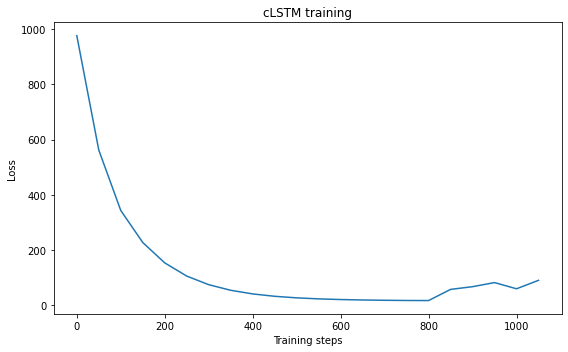

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(50 * np.arange(len(train_loss_adam)), train_loss_adam)
plt.title('cLSTM training')
plt.ylabel('Loss')
plt.xlabel('Training steps')
plt.tight_layout()
plt.show()

Estimated variable usage = 36.07%


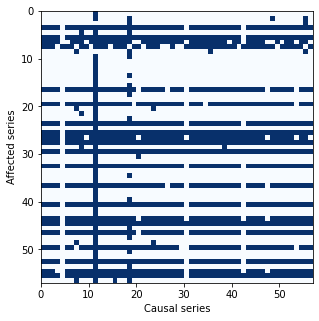

In [7]:
GC_est = clstm.GC().cpu().data.numpy()
fig, axarr = plt.subplots( figsize=(10, 5))
axarr.imshow(GC_est, cmap='Blues', vmin=0, vmax=1, extent=(0, len(GC_est), len(GC_est), 0))
axarr.set_ylabel('Affected series')
axarr.set_xlabel('Causal series')
print('Estimated variable usage = %.2f%%' % (100 * np.mean(GC_est)))

## time lag

In [9]:
X.shape[-1]

57

In [10]:
clstm = cLSTM(X.shape[-1], hidden=2).cuda(device=device)

In [11]:
train_loss_adam = train_model_ista(
    clstm, X, context=2, lam=10.0, lam_ridge=1e-2, lr=1e-3, max_iter=20000,
    check_every=50)

----------Iter = 50----------
Loss = 964.713257
Variable usage = 99.94%
----------Iter = 100----------
Loss = 545.310974
Variable usage = 77.50%
----------Iter = 150----------
Loss = 315.244049
Variable usage = 54.45%
----------Iter = 200----------
Loss = 197.916718
Variable usage = 39.46%
----------Iter = 250----------
Loss = 128.091949
Variable usage = 34.38%
----------Iter = 300----------
Loss = 85.690086
Variable usage = 32.50%
----------Iter = 350----------
Loss = 59.963154
Variable usage = 31.64%
----------Iter = 400----------
Loss = 44.271996
Variable usage = 30.41%
----------Iter = 450----------
Loss = 34.698177
Variable usage = 29.73%
----------Iter = 500----------
Loss = 28.837494
Variable usage = 29.21%
----------Iter = 550----------
Loss = 25.181656
Variable usage = 28.22%
----------Iter = 600----------
Loss = 22.904430
Variable usage = 26.99%
----------Iter = 650----------
Loss = 21.473934
Variable usage = 28.47%
----------Iter = 700----------
Loss = 20.774914
Variable usa

Estimated variable usage = 34.13%
less loss =  19.472439


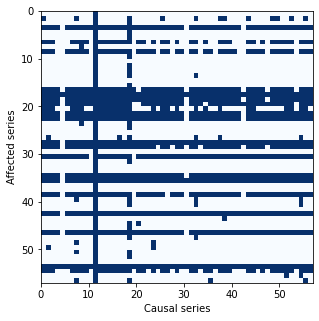

In [15]:
GC_est = clstm.GC().cpu().data.numpy()
fig, axarr = plt.subplots( figsize=(10, 5))
axarr.imshow(GC_est, cmap='Blues', vmin=0, vmax=1, extent=(0, len(GC_est), len(GC_est), 0))
axarr.set_ylabel('Affected series')
axarr.set_xlabel('Causal series')
print('Estimated variable usage = %.2f%%' % (100 * np.mean(GC_est)))
print('less loss = ',min(train_loss_adam).cpu().numpy())

In [20]:
GC_list = []
loss_list =[]
for i in range(11):
    clstm = cLSTM(X.shape[-1], hidden=2).cuda(device=device)
    
    train_loss_adam = train_model_ista(
        clstm, X, context=i+1, lam=10.0, lam_ridge=1e-2, lr=1e-3, max_iter=20000,
        check_every=50)
    GC_list.append(clstm.GC().cpu().data.numpy())
    loss_list.append(train_loss_adam)
    

----------Iter = 50----------
Loss = 960.169373
Variable usage = 99.94%
----------Iter = 100----------
Loss = 544.702759
Variable usage = 79.32%
----------Iter = 150----------
Loss = 322.367798
Variable usage = 48.66%
----------Iter = 200----------
Loss = 215.081879
Variable usage = 46.72%
----------Iter = 250----------
Loss = 145.888565
Variable usage = 40.60%
----------Iter = 300----------
Loss = 100.857269
Variable usage = 38.69%
----------Iter = 350----------
Loss = 71.702347
Variable usage = 37.61%
----------Iter = 400----------
Loss = 52.674301
Variable usage = 36.69%
----------Iter = 450----------
Loss = 40.312599
Variable usage = 36.13%
----------Iter = 500----------
Loss = 32.248722
Variable usage = 35.76%
----------Iter = 550----------
Loss = 26.964144
Variable usage = 35.43%
----------Iter = 600----------
Loss = 23.497530
Variable usage = 35.27%
----------Iter = 650----------
Loss = 21.217363
Variable usage = 35.12%
----------Iter = 700----------
Loss = 19.699169
Variable us

----------Iter = 850----------
Loss = 39.276737
Variable usage = 38.81%
Stopping early
----------Iter = 50----------
Loss = 969.364258
Variable usage = 99.88%
----------Iter = 100----------
Loss = 549.244629
Variable usage = 79.69%
----------Iter = 150----------
Loss = 304.222717
Variable usage = 49.58%
----------Iter = 200----------
Loss = 178.379456
Variable usage = 42.91%
----------Iter = 250----------
Loss = 109.010223
Variable usage = 33.27%
----------Iter = 300----------
Loss = 69.898041
Variable usage = 31.79%
----------Iter = 350----------
Loss = 47.712971
Variable usage = 30.75%
----------Iter = 400----------
Loss = 35.095024
Variable usage = 29.76%
----------Iter = 450----------
Loss = 27.939526
Variable usage = 29.27%
----------Iter = 500----------
Loss = 23.830139
Variable usage = 28.90%
----------Iter = 550----------
Loss = 21.446499
Variable usage = 27.27%
----------Iter = 600----------
Loss = 20.039310
Variable usage = 25.36%
----------Iter = 650----------
Loss = 19.7797

In [29]:
len(GC_list)

11

In [30]:
np.save('GC_list.npy',GC_list)

In [35]:
np.save('loss_list.npy',loss_list)

C:\Users\chanyoung\anaconda3\envs\pytorch\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [39]:
len(loss_list)

11

In [41]:
loss_list_2 = []
for i in range(len(loss_list)):
    loss_list_2.append(min(loss_list[i]).cpu().numpy())

In [44]:
np.save('loss_list.npy',loss_list_2)

In [45]:
a = np.load('loss_list.npy')

In [26]:
sum(GC_list[0])

array([21, 21, 21, 19,  2, 21, 21, 21, 22, 21, 19, 56, 21, 21, 21, 21, 21,
       21, 39, 20, 21, 21, 21, 22, 20, 20, 17, 20, 21, 20,  4, 21, 23, 21,
       21, 20, 20, 21, 21, 21, 20, 19,  9, 21, 21, 20, 21, 17, 22, 21, 21,
       20, 21, 19, 23, 22, 21])

In [27]:
sum(GC_list[1])

array([20, 20, 19, 18,  0, 20, 19, 22, 20, 18, 19, 57, 20, 20, 19, 20, 20,
       18, 38, 18, 19, 19, 19, 21, 19, 19, 17, 18, 20, 20,  5, 20, 21, 18,
       19, 19, 19, 20, 21, 19, 19, 20,  7, 20, 19, 18, 20, 16, 19, 20, 19,
       19, 20, 19, 22, 23, 19])